# Python Programming for Economics and Finance

https://python-programming.quantecon.org/intro.html

## numpy

Os recursos fundamentais de processamento de matriz e arrays são fornecidos pela excelente biblioteca NumPy.

O NumPy fornece o tipo de dados básico do array mais algumas operações de processamento simples.

In [5]:
import numpy as np                     # Load the library

a = np.linspace(-np.pi, np.pi, 5)    # Create even grid from -π to π
b = np.cos(a)                          # Apply cosine to each element of a
c = np.sin(a)                          # Apply sin to each element of a

print(a)
print(b)
print(c)

print(b @ c)

[-3.14159265 -1.57079633  0.          1.57079633  3.14159265]
[-1.000000e+00  6.123234e-17  1.000000e+00  6.123234e-17 -1.000000e+00]
[-1.2246468e-16 -1.0000000e+00  0.0000000e+00  1.0000000e+00
  1.2246468e-16]
0.0


## scipy

A biblioteca SciPy é construída em cima do NumPy e fornece funcionalidades adicionais.

Por exemplo, vamos calcular $\int_{-2}^{2} \Phi(z) \; dz$ Onde $\Phi$ é a densidade normal padrão.


In [20]:
from scipy.stats import norm
from scipy.integrate import quad

ϕ = norm()
value, error = quad(ϕ.pdf, -2, 2)  # Integrate using Gaussian quadrature
value

0.9544997361036417

SciPy inclui muitas das rotinas padrão usadas em

- álgebra Linear
- integração
- interpolação
- otimização
- distribuições e geração de números aleatórios
- processamento de sinal

## Algebra Simbólica

É útil poder manipular expressões simbólicas, como no Mathematica ou Maple.

A biblioteca SymPy fornece essa funcionalidade de dentro do shell do Python.

In [8]:
from sympy import Symbol

x, y = Symbol('x'), Symbol('y')  # Treat 'x' and 'y' as algebraic symbols
x + x + x + y

3*x + y

In [9]:
expression = (x + y)**2
expression.expand()

x**2 + 2*x*y + y**2

In [10]:
from sympy import solve

solve(x**2 + x + 2)

[-1/2 - sqrt(7)*I/2, -1/2 + sqrt(7)*I/2]

In [11]:
from sympy import limit, sin, diff

limit(1 / x, x, 0)

oo

In [12]:
limit(sin(x) / x, x, 0)

1

In [13]:
diff(sin(x), x)

cos(x)

A beleza de importar essa funcionalidade para o Python é que estamos trabalhando em uma linguagem de programação completa.

Podemos facilmente criar tabelas de derivadas, gerar saída LaTeX, adicionar essa saída a figuras e assim por diante.

## Estatística

- pandas
- statsmodels — várias rotinas estatísticas
- scikit-learn — aprendizado de máquina em Python (patrocinado pelo Google, entre outros)
- pyMC — para análise de dados Bayesiana
- pystan análise Bayesiana baseada em stan

## Redes e Grafos

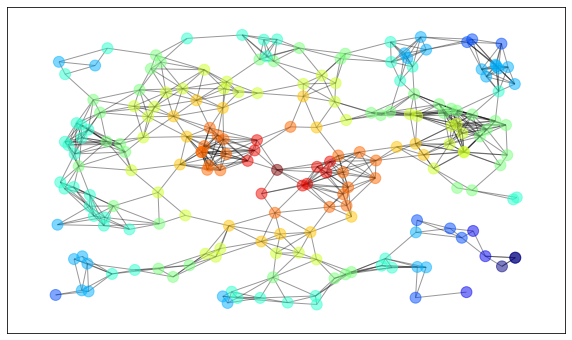

In [15]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)
np.random.seed(1234)

# Generate a random graph
p = dict((i, (np.random.uniform(0, 1), np.random.uniform(0, 1)))
         for i in range(200))
g = nx.random_geometric_graph(200, 0.12, pos=p)
pos = nx.get_node_attributes(g, 'pos')

# Find node nearest the center point (0.5, 0.5)
dists = [(x - 0.5)**2 + (y - 0.5)**2 for x, y in list(pos.values())]
ncenter = np.argmin(dists)

# Plot graph, coloring by path length from central node
p = nx.single_source_shortest_path_length(g, ncenter)
plt.figure()
nx.draw_networkx_edges(g, pos, alpha=0.4)
nx.draw_networkx_nodes(g,
                       pos,
                       nodelist=list(p.keys()),
                       node_size=120, alpha=0.5,
                       node_color=list(p.values()),
                       cmap=plt.cm.jet_r)
plt.show()

## Outras bibliotecas

- Jupyter — Python em seu navegador com células de código interativas, imagens incorporadas e outros recursos úteis.
- Numba — Faça o Python rodar na mesma velocidade que o código de máquina nativo!
- Blaze — uma generalização do NumPy.
- PyTables — gerencie grandes conjuntos de dados.
- CVXPY — otimização convexa em Python.

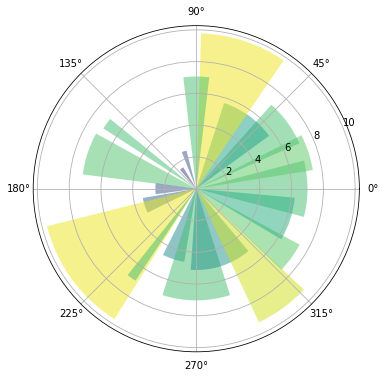

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 20
θ = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(111, projection='polar')
ax.bar(θ, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

In [19]:
x = %pwd
x

'C:\\Development\\FK\\ITA_Tese\\markov'

# MErcado - Exemplo 7.3.3 de OOP
https://python-programming.quantecon.org/python_oop.html

Vamos escrever uma classe para o mercado competitivo em que compradores e vendedores são ambos tomadores de preços.

O mercado consiste nos seguintes objetos:

- Uma curva de demanda linear: $Q = a_{d} - b_{d}p$

- Uma curva de oferta linear: $Q = a_{z} + b_{z}(p-t)$

Aqui

- $p$ é o preço pago pelo comprador, $Q$ é quantidade e $t$ é um imposto por unidade.
- Outros símbolos são parâmetros de demanda e oferta.

A classe fornece métodos para calcular vários valores de juros, incluindo preço e quantidade de equilíbrio competitivo, receita tributária levantada, excedente do consumidor e excedente do produtor.

Aqui está nossa implementação.

(Ele usa uma função do SciPy chamada quad para integração numérica - um tópico sobre o qual falaremos mais adiante.)

In [21]:
from scipy.integrate import quad

class Market:

    def __init__(self, ad, bd, az, bz, tax):
        """
        Set up market parameters.  All parameters are scalars.  See
        https://lectures.quantecon.org/py/python_oop.html for interpretation.

        """
        self.ad, self.bd, self.az, self.bz, self.tax = ad, bd, az, bz, tax
        if ad < az:
            raise ValueError('Insufficient demand.')

    def price(self):
        "Compute equilibrium price"
        return  (self.ad - self.az + self.bz * self.tax) / (self.bd + self.bz)

    def quantity(self):
        "Compute equilibrium quantity"
        return  self.ad - self.bd * self.price()

    def consumer_surp(self):
        "Compute consumer surplus"
        # == Compute area under inverse demand function == #
        integrand = lambda x: (self.ad / self.bd) - (1 / self.bd) * x
        area, error = quad(integrand, 0, self.quantity())
        return area - self.price() * self.quantity()

    def producer_surp(self):
        "Compute producer surplus"
        #  == Compute area above inverse supply curve, excluding tax == #
        integrand = lambda x: -(self.az / self.bz) + (1 / self.bz) * x
        area, error = quad(integrand, 0, self.quantity())
        return (self.price() - self.tax) * self.quantity() - area

    def taxrev(self):
        "Compute tax revenue"
        return self.tax * self.quantity()

    def inverse_demand(self, x):
        "Compute inverse demand"
        return self.ad / self.bd - (1 / self.bd)* x

    def inverse_supply(self, x):
        "Compute inverse supply curve"
        return -(self.az / self.bz) + (1 / self.bz) * x + self.tax

    def inverse_supply_no_tax(self, x):
        "Compute inverse supply curve without tax"
        return -(self.az / self.bz) + (1 / self.bz) * x

In [23]:
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)
print("equilibrium price = ", m.price())
print("consumer surplus = ", m.consumer_surp())

equilibrium price =  18.5
consumer surplus =  33.0625


Aqui está um pequeno programa que usa esta classe para traçar uma curva de demanda inversa junto com curvas de oferta inversas com e sem impostos

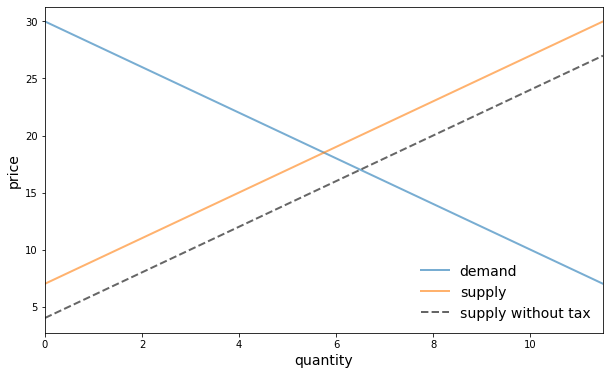

In [25]:
# Baseline ad, bd, az, bz, tax

q_max = m.quantity() * 2
q_grid = np.linspace(0.0, q_max, 100)
pd = m.inverse_demand(q_grid)
ps = m.inverse_supply(q_grid)
psno = m.inverse_supply_no_tax(q_grid)

fig, ax = plt.subplots()
ax.plot(q_grid, pd, lw=2, alpha=0.6, label='demand')
ax.plot(q_grid, ps, lw=2, alpha=0.6, label='supply')
ax.plot(q_grid, psno, '--k', lw=2, alpha=0.6, label='supply without tax')
ax.set_xlabel('quantity', fontsize=14)
ax.set_xlim(0, q_max)
ax.set_ylabel('price', fontsize=14)
ax.legend(loc='lower right', frameon=False, fontsize=14)
plt.show()

O próximo programa fornece uma função que

recebe uma instância de Marketcomo parâmetro

calcula a perda de peso morto a partir da imposição do imposto

In [27]:
def deadw(m):
    "Computes deadweight loss for market m."
    # == Create analogous market with no tax == #
    m_no_tax = Market(m.ad, m.bd, m.az, m.bz, 0)
    # == Compare surplus, return difference == #
    surp1 = m_no_tax.consumer_surp() + m_no_tax.producer_surp()
    surp2 = m.consumer_surp() + m.producer_surp() + m.taxrev()
    return surp1 - surp2

deadw(m)

1.125

# Need for Speed - Vetorização

https://python-programming.quantecon.org/need_for_speed.html

In [28]:
import random
import numpy as np
import quantecon as qe

In [29]:
n = 1_000_000

In [30]:
%%time

y = 0      # Will accumulate and store sum
for i in range(n):
    x = random.uniform(0, 1)
    y += x**2

CPU times: total: 500 ms
Wall time: 535 ms


In [32]:
%%time

x = np.random.uniform(0, 1, n)
y = np.sum(x**2)

CPU times: total: 15.6 ms
Wall time: 16 ms


# Numba

$x_{t+1} = \alpha x_{t}(1-x_{t})$

In [33]:
α = 4.0

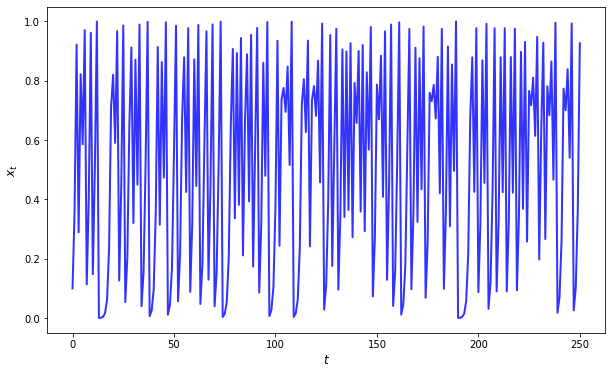

In [34]:
def qm(x0, n):
    x = np.empty(n+1)
    x[0] = x0
    for t in range(n):
      x[t+1] = α * x[t] * (1 - x[t])
    return x

x = qm(0.1, 250)
fig, ax = plt.subplots()
ax.plot(x, 'b-', lw=2, alpha=0.8)
ax.set_xlabel('$t$', fontsize=12)
ax.set_ylabel('$x_{t}$', fontsize = 12)
plt.show()

In [35]:
from numba import jit

qm_numba = jit(qm)

In [36]:
n = 10_000_000



TOC: Elapsed: 0:00:6.31


In [38]:
qe.tic()
qm(0.1, int(n))
time1 = qe.toc()

TOC: Elapsed: 0:00:6.48


In [39]:
qe.tic()
qm_numba(0.1, int(n))
time2 = qe.toc()

TOC: Elapsed: 0:00:0.23


In [40]:
qe.tic()
qm_numba(0.1, int(n))
time3 = qe.toc()

TOC: Elapsed: 0:00:0.04


In [107]:
n = 1_000_000


In [108]:
from numba import njit
from random import uniform

def monte_carlo_pi(n):
    count = 0
    for i in range(n):
        u, v = np.random.uniform(), np.random.uniform()

        d = np.sqrt((u - 0.5)**2 + (v - 0.5)**2)

        if d < 0.5:
            count += 1
    #     print(u, v, d, count)

    area_estimate = count / n
    
    return area_estimate * 4


@njit
def monte_carlo_pi_numba(n):
    
    count = 0
    for i in range(n):
        u, v = uniform(0, 1), uniform(0, 1)

        d = np.sqrt((u - 0.5)**2 + (v - 0.5)**2)

        if d < 0.5:
            count += 1

    area_estimate = count / n
    
    return area_estimate * 4

In [109]:
qe.tic()
x = monte_carlo_pi(n)
print(x)
time4 = qe.toc()

3.143168
TOC: Elapsed: 0:00:5.02


In [110]:
qe.tic()
x = monte_carlo_pi_numba(n)
print(x)
time5 = qe.toc()

3.140916
TOC: Elapsed: 0:00:0.16


In [ ]:
qe.tic()
monte_carlo_pi_numba(n)
time5 = qe.toc()

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.